In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df.describe()  # 0 didnt survive and 1 means survived..?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop(['Cabin'],axis=1,inplace=True)
df.drop(['Ticket'],axis=1,inplace=True)
df.drop(['Name'],axis=1,inplace=True)

In [9]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [10]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [14]:
df.set_index('PassengerId')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [15]:
cat_cols=['Sex','Embarked']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

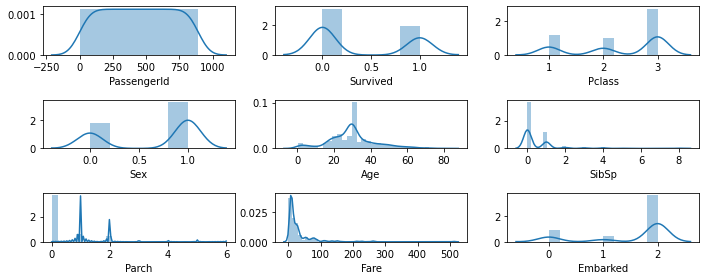

In [16]:
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Age'>

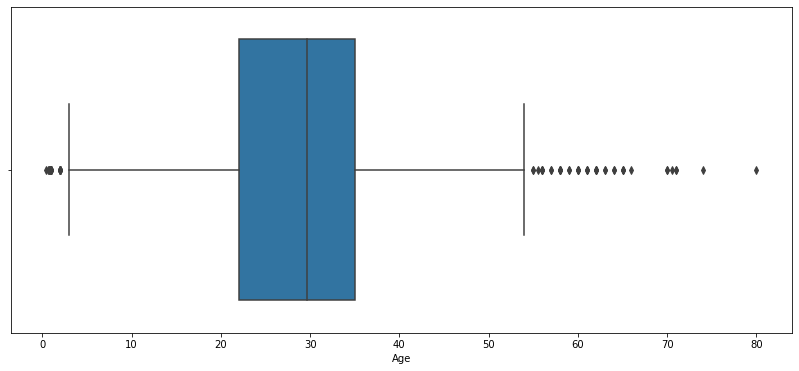

In [19]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='Age',data=df)

<AxesSubplot:xlabel='SibSp'>

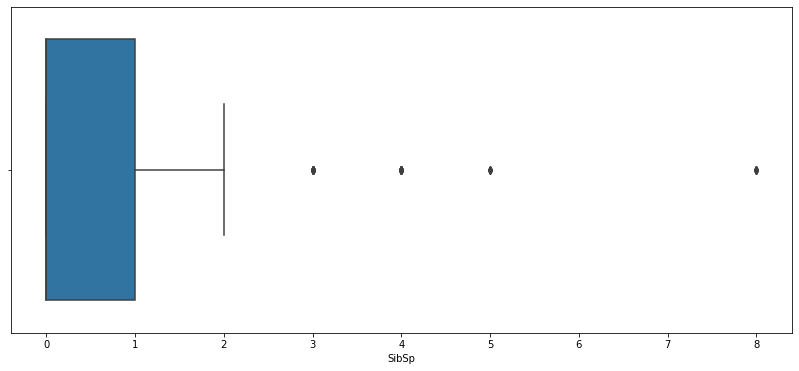

In [20]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Parch'>

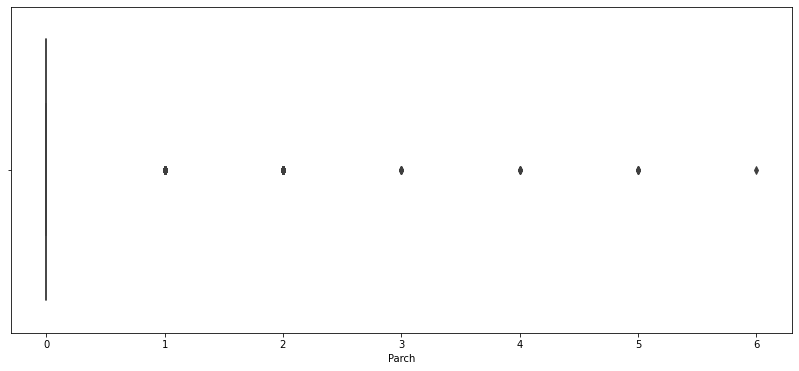

In [21]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='Parch',data=df)

<AxesSubplot:xlabel='Fare'>

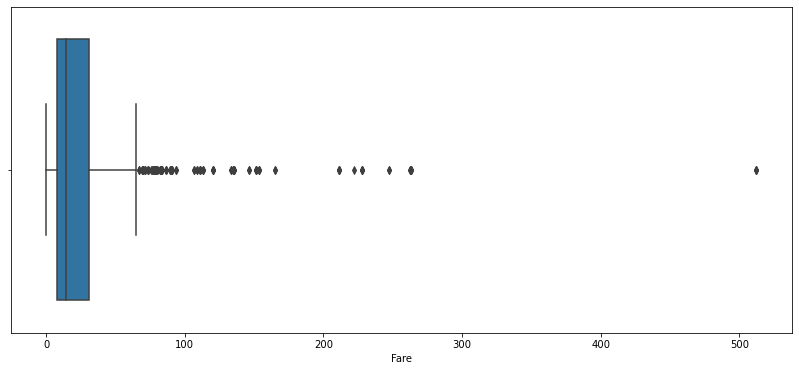

In [22]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='Fare',data=df)

In [23]:
df = df[(df['Age']<67)]
df = df[(df['SibSp']<2)]
df = df[(df['Parch']<2)]
df = df[(df['Fare']<250)]

In [24]:
df.shape

(745, 9)

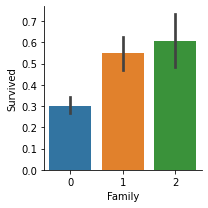

In [25]:
df["Family"] = df["SibSp"] + df["Parch"]
sns.factorplot(x="Family", y ="Survived", data=df, kind="bar", size=3)
plt.show()

In [26]:
df = pd.get_dummies(df,columns=["Pclass"])
df = pd.get_dummies(df,columns=["Embarked"])
df = pd.get_dummies(df,columns=["Family"])

df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Family_0,Family_1,Family_2
0,1,0,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,1,0
1,2,1,0,38.0,1,0,71.2833,1,0,0,1,0,0,0,1,0
2,3,1,0,26.0,0,0,7.9250,0,0,1,0,0,1,1,0,0
3,4,1,0,35.0,1,0,53.1000,1,0,0,0,0,1,0,1,0
4,5,0,1,35.0,0,0,8.0500,0,0,1,0,0,1,1,0,0


In [27]:
# train test split

In [28]:
X=df.drop(labels=['Survived'],axis=1)
Y=df['Survived']

In [29]:
X

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Family_0,Family_1,Family_2
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,1,0
1,2,0,38.0,1,0,71.2833,1,0,0,1,0,0,0,1,0
2,3,0,26.0,0,0,7.9250,0,0,1,0,0,1,1,0,0
3,4,0,35.0,1,0,53.1000,1,0,0,0,0,1,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,1,25.0,0,0,7.0500,0,0,1,0,0,1,1,0,0
886,887,1,27.0,0,0,13.0000,0,1,0,0,0,1,1,0,0
887,888,0,19.0,0,0,30.0000,1,0,0,0,0,1,1,0,0
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,0,1,0,0


In [30]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 745, dtype: int64

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(596, 15) (149, 15) (596,) (149,)


In [32]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on train 
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds).sum(),'/',((Y_test == test_preds).sum()+(Y_test != test_preds).sum()))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds))

Model accuracy on train is:  0.8154362416107382
Model accuracy on test is:  0.8053691275167785
--------------------------------------------------
ROC score on train is:  0.7962449174838554
ROC score on test is:  0.7694892473118279
--------------------------------------------------
confusion_matrix train is:  [[324  46]
 [ 64 162]]
confusion_matrix test is:  [[85  8]
 [21 35]]
Wrong predictions out of total
--------------------------------------------------
29 / 149
--------------------------------------------------
KappaScore is:  0.5650729743331655


In [33]:
NB=GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

In [34]:
#fit the model on train data 
NB=GaussianNB()
NB.fit(X_train,Y_train)

#predict on train 
train_preds2 = NB.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = NB.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds2))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds2))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))                  #80,74,80,77

Model accuracy on train is:  0.761744966442953
Model accuracy on test is:  0.8187919463087249
--------------------------------------------------
ROC score on train is:  0.7495575221238938
ROC score on test is:  0.7944508448540707
--------------------------------------------------
confusion_matrix train is:  [[296  74]
 [ 68 158]]
confusion_matrix test is:  [[83 10]
 [17 39]]
Wrong predictions out of total
--------------------------------------------------
27 / 149
--------------------------------------------------
KappaScore is:  0.6039184798661021


In [35]:
#fit the model on train data 
DT = DecisionTreeClassifier().fit(X,Y)

#predict on train 
train_preds3 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds3))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds3))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------
ROC score on train is:  1.0
ROC score on test is:  1.0
--------------------------------------------------
confusion_matrix train is:  [[370   0]
 [  0 226]]
confusion_matrix test is:  [[93  0]
 [ 0 56]]
Wrong predictions out of total
--------------------------------------------------
0 / 149
--------------------------------------------------
KappaScore is:  1.0


In [36]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train 
train_preds4 = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds4))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds4))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8120805369127517
--------------------------------------------------
ROC score on train is:  1.0
ROC score on test is:  0.7784178187403993
--------------------------------------------------
confusion_matrix train is:  [[370   0]
 [  0 226]]
confusion_matrix test is:  [[85  8]
 [20 36]]
Wrong predictions out of total
--------------------------------------------------
28 / 149
--------------------------------------------------
KappaScore is:  0.5816285599679101


In [37]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds5))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds5))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

Model accuracy on train is:  0.7449664429530202
Model accuracy on test is:  0.6845637583892618
--------------------------------------------------
ROC score on train is:  0.6990193733556566
ROC score on test is:  0.6514016897081413
--------------------------------------------------
confusion_matrix train is:  [[329  41]
 [111 115]]
confusion_matrix test is:  [[73 20]
 [27 29]]
Wrong predictions out of total
--------------------------------------------------
47 / 149
--------------------------------------------------
KappaScore is:  0.3105247612484001


In [38]:
#fit the model on train data 
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train 
train_preds6 = SVM.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds6))

#predict on test
test_preds6 = SVM.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds6))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds6))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds6))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds6))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds6))
print('Wrong predictions out of total')
print('-'*50)

print("recall", metrics.recall_score(Y_test, test_preds6))
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds6).sum(),'/',((Y_test == test_preds6).sum()+(Y_test != test_preds6).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds6))

Model accuracy on train is:  0.8120805369127517
Model accuracy on test is:  0.7986577181208053
--------------------------------------------------
ROC score on train is:  0.7875149485768955
ROC score on test is:  0.7605606758832565
--------------------------------------------------
confusion_matrix train is:  [[329  41]
 [ 71 155]]
confusion_matrix test is:  [[85  8]
 [22 34]]
Wrong predictions out of total
--------------------------------------------------
recall 0.6071428571428571
--------------------------------------------------
30 / 149
--------------------------------------------------
KappaScore is:  0.5483936148716912


In [39]:
# test dataset

In [40]:
test_df=pd.read_csv('test.csv')

In [41]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [42]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [44]:
test_df.drop(['Cabin'],axis=1,inplace=True)

In [45]:
test_df.drop(['Name'],axis=1,inplace=True)

In [46]:
test_df.drop(['Ticket'],axis=1,inplace=True)

In [47]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [48]:
cat_cols=['Sex','Embarked']
le=LabelEncoder()
for i in cat_cols:
    test_df[i]=le.fit_transform(test_df[i])
test_df.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [49]:
test_df = test_df[(test_df['Age']<67)]
test_df = test_df[(test_df['SibSp']<2)]
test_df = test_df[(test_df['Parch']<2)]
test_df = test_df[(test_df['Fare']<250)]

In [50]:
test_df["Family"] = test_df["SibSp"] + test_df["Parch"]

In [51]:
test_df = pd.get_dummies(test_df,columns=["Pclass"])
test_df = pd.get_dummies(test_df,columns=["Embarked"])
test_df = pd.get_dummies(test_df,columns=["Family"])

test_df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Family_0,Family_1,Family_2
0,892,1,34.5,0,0,7.8292,0,0,1,0,1,0,1,0,0
1,893,0,47.0,1,0,7.0000,0,0,1,0,0,1,0,1,0
2,894,1,62.0,0,0,9.6875,0,1,0,0,1,0,1,0,0
3,895,1,27.0,0,0,8.6625,0,0,1,0,0,1,1,0,0
4,896,0,22.0,1,1,12.2875,0,0,1,0,0,1,0,0,1


In [52]:
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Family_0,Family_1,Family_2
0,1,0,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,1,0
1,2,1,0,38.0,1,0,71.2833,1,0,0,1,0,0,0,1,0
2,3,1,0,26.0,0,0,7.9250,0,0,1,0,0,1,1,0,0
3,4,1,0,35.0,1,0,53.1000,1,0,0,0,0,1,0,1,0
4,5,0,1,35.0,0,0,8.0500,0,0,1,0,0,1,1,0,0


In [53]:
df.shape

(745, 16)

In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_0', 'Embarked_1',
       'Embarked_2', 'Family_0', 'Family_1', 'Family_2'],
      dtype='object')

In [55]:
test_df.columns

Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Family_0', 'Family_1', 'Family_2'],
      dtype='object')

In [56]:
train_prediction= KNN.predict(test_df)

In [57]:
test_df['Survived'] = train_prediction

In [58]:
test_df

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Family_0,Family_1,Family_2,Survived
0,892,1,34.50000,0,0,7.8292,0,0,1,0,1,0,1,0,0,0
1,893,0,47.00000,1,0,7.0000,0,0,1,0,0,1,0,1,0,0
2,894,1,62.00000,0,0,9.6875,0,1,0,0,1,0,1,0,0,0
3,895,1,27.00000,0,0,8.6625,0,0,1,0,0,1,1,0,0,0
4,896,0,22.00000,1,1,12.2875,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,1,30.27259,0,0,8.0500,0,0,1,0,0,1,1,0,0,0
414,1306,0,39.00000,0,0,108.9000,1,0,0,1,0,0,1,0,0,1
415,1307,1,38.50000,0,0,7.2500,0,0,1,0,0,1,1,0,0,0
416,1308,1,30.27259,0,0,8.0500,0,0,1,0,0,1,1,0,0,0


In [59]:
import pickle
filename='KNN.pkl'
pickle.dump(log_reg,open(filename,'wb'))

In [60]:
submissionfile=pd.read_csv('gender_submission.csv')
submissionfile

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
submissionfile.drop(['Survived'],axis=1,inplace=True)

In [62]:
submissionfile

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [63]:
mysub=pd.concat([submissionfile['PassengerId'],test_df['Survived']],axis=1)

In [64]:
mysub

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [65]:
mysub.to_csv('KNN.csv',index=False)

In [66]:
# naivebayes prediction

In [67]:
test_df.drop(['Survived'],axis=1,inplace=True)

In [68]:
train_prediction2= NB.predict(test_df)

In [69]:
test_df['Survived'] = train_prediction2

In [70]:
submissionfile

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [71]:
mysub2=pd.concat([submissionfile['PassengerId'],test_df['Survived']],axis=1)

In [72]:
mysub2

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [73]:
mysub2.to_csv('NBpredict.csv',index=False)

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1)

# fit
model.fit(X_train, Y_train)

# predict
Y_pred = model.predict(X_test)

In [76]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[93,  0],
       [49,  7]], dtype=int64)

In [77]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(Y_test, Y_pred))

# precision
print("precision", metrics.precision_score(Y_test, Y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(Y_test, Y_pred))


accuracy 0.6711409395973155
precision 1.0
recall 0.125


In [78]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [79]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train, Y_train, cv = folds, scoring = 'accuracy') 

In [80]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.51666667 0.65546218 0.71428571 0.62184874 0.68067227]
mean accuracy = 0.6377871148459384


In [81]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      

In [82]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [83]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014758,3.472970e-03,0.004807,0.003925,0.1,{'C': 0.1},0.508333,0.663866,0.705882,0.579832,...,0.620994,0.069441,5,0.649160,0.610063,0.599581,0.631027,0.614256,0.620817,0.017420
1,0.014399,3.199601e-03,0.006408,0.003204,1,{'C': 1},0.516667,0.655462,0.714286,0.621849,...,0.637787,0.067717,4,0.663866,0.645702,0.633124,0.635220,0.626834,0.640949,0.012970
2,0.016001,4.623108e-07,0.003201,0.003920,10,{'C': 10},0.591667,0.689076,0.764706,0.663866,...,0.683039,0.056470,3,0.695378,0.685535,0.664570,0.687631,0.677149,0.682053,0.010493
3,0.020798,3.915496e-03,0.003199,0.003918,100,{'C': 100},0.600000,0.689076,0.764706,0.672269,...,0.688067,0.053977,2,0.714286,0.696017,0.677149,0.698113,0.685535,0.694220,0.012553
4,0.029204,6.142184e-03,0.006391,0.003196,1000,{'C': 1000},0.633333,0.714286,0.798319,0.689076,...,0.718263,0.056457,1,0.737395,0.727463,0.719078,0.744235,0.719078,0.729450,0.010008


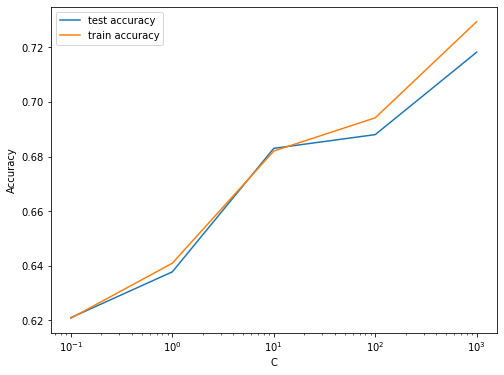

In [84]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [85]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.718263305322129 at C = 1000


In [86]:
# model with the best value of C
model = SVC(C=best_C)

# fit
model.fit(X_train, Y_train)

# predict
y_pred = model.predict(X_test)

In [87]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(Y_test, y_pred))

# precision
print("precision", metrics.precision_score(Y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(Y_test, y_pred))


accuracy 0.8053691275167785
precision 1.0
recall 0.48214285714285715


In [88]:
# specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(X_train, Y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.718263305322129 at C = {'C': 1000}


# Tuning hyper-parameters for precision
 The highest precision score is 0.7818113912231559 at C = {'C': 10}


# Tuning hyper-parameters for recall
 The highest recall score is 0.38660613397901533 at C = {'C': 1000}


